# Create Map Charts with Python
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.com)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

<br>Hi people, en este post enseñare a crear gráficos de mapas con python para poder analizar información con un enfoque geografico :D.

Para Python les recomiendo que usen __[winpython](https://winpython.github.io/)__ (solo windows, pero es portable)  o __[anaconda](https://www.anaconda.com/download/)__ (es multiplataforma, pero requiere de instalación). Al instalar cualquiera de estas distribuciones encontraran los ejecutables Jupyter Notebook (el formato del post, los archivos tienen extensión es .ipynb) y Spyder (IDE que recomiendo para trabajar porque permite visualizar las variables y su tipo, los archivos tienen extensión es .py)

En la página del blog dejaré los notebooks (se abren con jupyter notebook), los scripts de python (recomiendo que usen spyder para trabajar con estos archivos) y los archivos de excel y shapes con la data usada en los ejemplos.
<br>Los temas que trataremos en este post son:
1. Instalación de Geopandas.
1. Creación de Mapas con colores y leyendas.
    1. Creación de Mapa del Mundo.
    1. Creación de Mapa de un País.
    
## 1. Instalación de Geopandas.
<br>Para empezar debemos instalar Geopandas en nuestra distribución de Python, para poder instalarlo seguimos los siguientes pasos:
* Abrir el terminal de nuestra distribución de winpython, el archivo se llama "WinPython Command Prompt.exe".
* Instalar los paquetes de requerimientos escribiendo el siguiente comando en la terminal: __pip install fiona, shapefile, pyshp, six, pyproj, psycopg2, geopy, rtree, descartes, pysal, libgdal, gdal, geos__
* En caso exista error al instalar alguno de esos paquetes, lo recomendable es descargarlos de esta __[Página](https://www.lfd.uci.edu/~gohlke/pythonlibs/)__ 
* Los archivos descargados tendran la extensión .whl, para instalarlos escribir el siguiente comando en la terminal: __pip install "Ruta del Archivo\Nombre del Archivo.whl"__, o si estan en la misma carpeta del terminal usar el comando: __pip install "Nombre del Archivo.whl"__. Ambos comandos sin las comillas.
* Para descargar archivos de mapas de cualquier país pueden ir a las siguientes páginas __[gadm](https://gadm.org/download_country_v3.html)__ y __[diva-gis](http://www.diva-gis.org/gdata)__

## 2. Creación de Mapas con colores y leyendas.
### 1. Creación de Mapa del Mundo.
Para ver las propiedades de los gráficos de geopandas pueden consultar en la pagina de geopandas y en la de matplotlib.

In [1]:
%matplotlib inline

# Utilizando la base de datos de prueba que viene con geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mostrando la data cargada
display(df[0:10])

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot: >

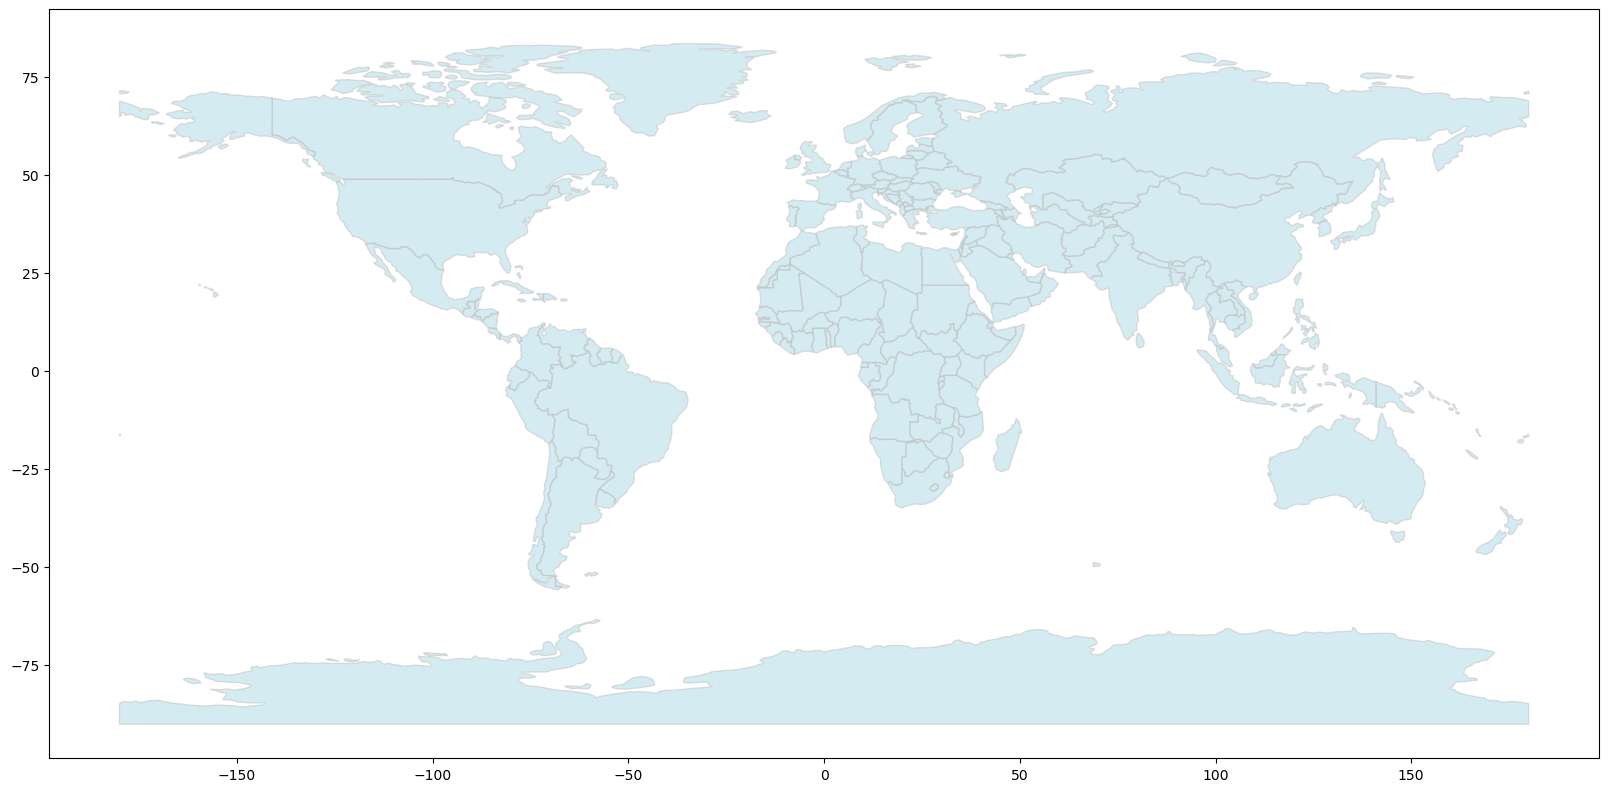

In [2]:
# Graficando el mapa
df.plot(figsize=(20, 25), alpha=0.5, edgecolor='silver', color = 'lightblue')

In [3]:
# Eliminando a la antartida
df = df[(df['iso_a3'] != 'ATA') & (df['iso_a3'] != 'ATF')]
display(df[0:10])

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot: >

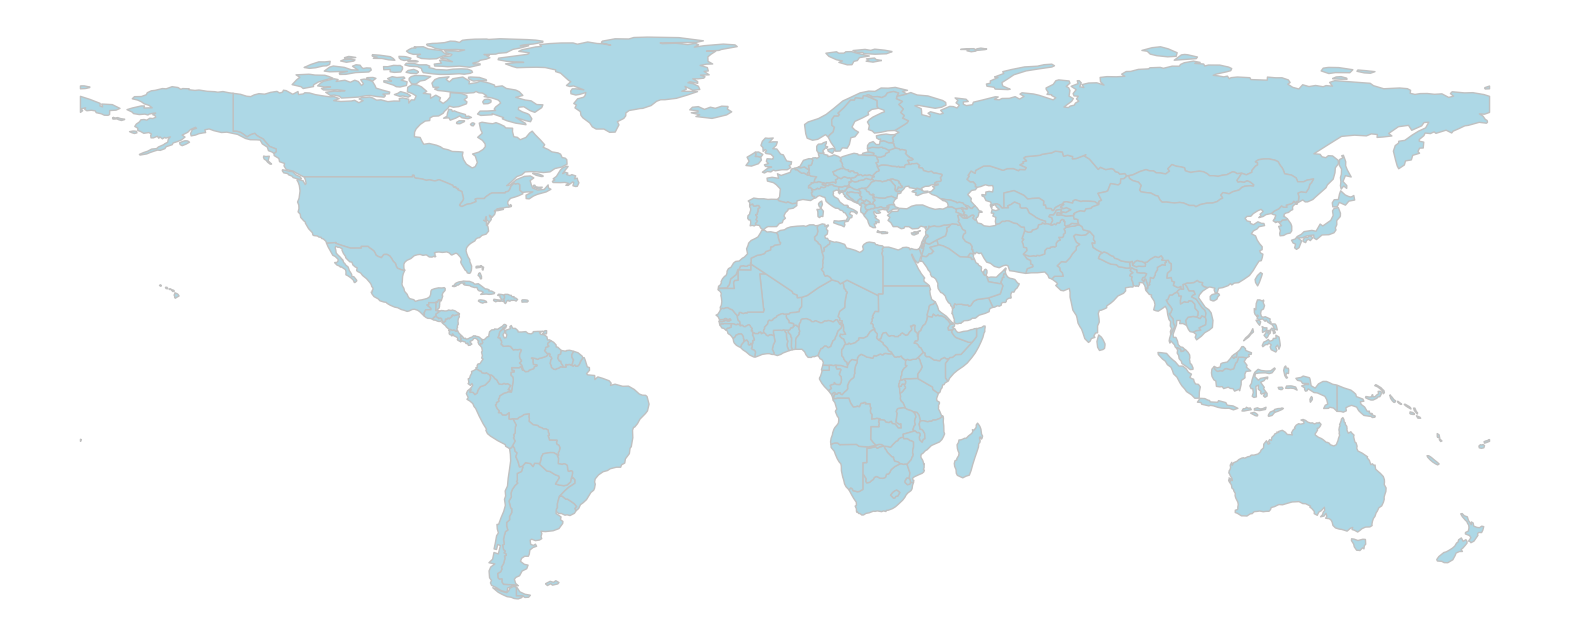

In [4]:
# Creando la figura y los ejes para poder editarlos con matplotlib
fig, ax = plt.subplots(figsize=(20,25), subplot_kw={'aspect':'equal'})
# Eliminando los bordes del cuadro
ax.axis('off')

df.plot(edgecolor = 'silver', color = 'lightblue', ax = ax)

### 2. Creación de Mapa de un País.
Luego de descargar la data de un país y descomprimirlo en la misma carpeta del notebook o script, usamos el siguiente código:

In [5]:
import geopandas as gpd

# Cargando la informacion de la carpeta de la data descargada
df = gpd.read_file("Limite_departamental")

display(df)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((212372.284 9332652.146, 212473.276 9..."
1,ANCASH,166,02,3.596225e+06,"POLYGON ((150666.941 9058816.782, 150667.214 9..."
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((781311.035 8490376.526, 781314.444 8..."
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((518459.305 8278798.442, 518429.805 8..."
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((571155.261 8654149.131, 571057.668 8..."
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((25179.070 9209709.788, 25130.784 920..."
6,CALLAO,6,07,1.414095e+04,"POLYGON ((265262.111 8665012.021, 265257.362 8..."
7,CUSCO,108,08,7.207614e+06,"POLYGON ((875377.090 8338199.014, 875434.571 8..."
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((577364.103 8587853.003, 577430.134 8..."
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((290289.525 8963832.641, 290399.011 8..."


In [6]:
import pandas as pd
import numpy as np

# Creando un valor con la variable a graficar
a = np.random.uniform(0, 25, 25)
df1 = gpd.GeoDataFrame(a, columns = ['Valor'])

# Uniendo la nueva variable a la data del mapa
df = pd.concat([df, df1] , axis=1)

# Mostrando la nueva tabla
display(df)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,Valor
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((212372.284 9332652.146, 212473.276 9...",6.780353
1,ANCASH,166,02,3.596225e+06,"POLYGON ((150666.941 9058816.782, 150667.214 9...",2.472608
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((781311.035 8490376.526, 781314.444 8...",11.076163
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((518459.305 8278798.442, 518429.805 8...",9.117369
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((571155.261 8654149.131, 571057.668 8...",8.877221
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((25179.070 9209709.788, 25130.784 920...",11.100558
6,CALLAO,6,07,1.414095e+04,"POLYGON ((265262.111 8665012.021, 265257.362 8...",10.173074
7,CUSCO,108,08,7.207614e+06,"POLYGON ((875377.090 8338199.014, 875434.571 8...",12.435538
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((577364.103 8587853.003, 577430.134 8...",19.526409
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((290289.525 8963832.641, 290399.011 8...",13.368523


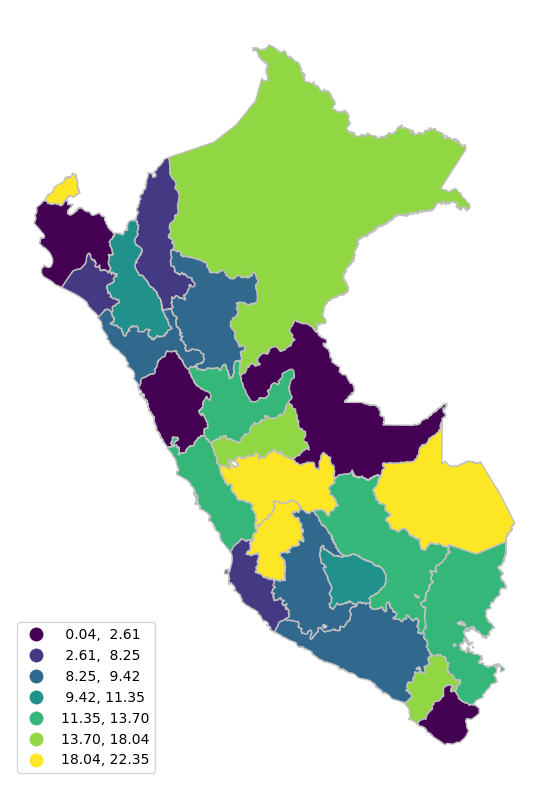

In [7]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = df.plot(column='Valor', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = 'silver', #color bordes
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

#Grabando la figura en formato jpg
#fig.savefig("Peru_Departamentos.jpg", edgecolor='k', quality = 95 )

Ahora vamos a crear el mapa por distritos

In [8]:
# Cargando la informacion de la carpeta de la data descargada
df = gpd.read_file("Limite_distrital")

# Averiguamos cuantos distritos hay en el archivo de Perú
print(len(df))

1834


In [9]:
# Creando un valor con la variable a graficar por distrito
a = np.random.uniform(0, 1834, 1834)
df1 = gpd.GeoDataFrame(a, columns = ['Valor'])

# Uniendo la nueva variable a la data del mapa
df = pd.concat([df, df1] , axis=1)

# Mostrando la nueva tabla
display(df)

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((1014289.567 7992735.763, 1014282.146...",1030.696121
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((1040112.262 8007010.371, 1039963.302...",1095.340903
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((1020148.559 8005109.635, 1019927.551...",925.344070
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((1004931.516 8004168.994, 1005030.078...",1566.773525
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((985122.355 8016071.866, 985176.222 8...",955.439097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((503874.818 9738523.018, 504363.715 9...",358.169529
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((729229.887 9685991.762, 727609.175 9...",717.775921
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((663455.849 9838801.709, 663522.041 9...",597.993479
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((514052.636 9894982.718, 513481.548 9...",324.216170


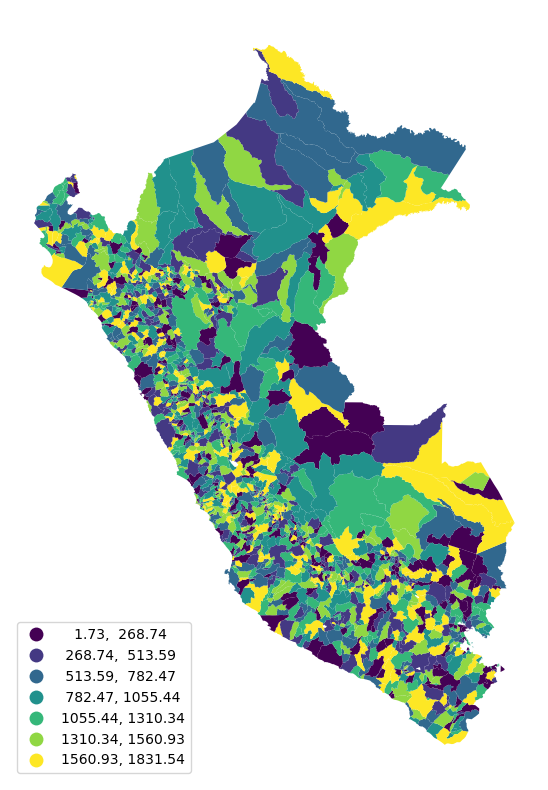

In [10]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = df.plot(column='Valor', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

#Grabando la figura en formato jpg
#fig.savefig("Peru_Distritos.jpg", edgecolor='k', quality = 95 )

Espero les haya gustado este tutorial y que les sirva para hacer presentaciones de alto impacto.

In [11]:
#from utils import init_spark
import findspark
findspark.init(spark_home="/opt/spark")
import pyspark.sql.functions as F
from pyspark.sql.types import StringType
import pandas as pd
import matplotlib.pylab as plt  # use matplotlib's pyplot package
from pyspark.sql.functions import col
from pyspark.sql.functions import countDistinct
from init_pyspark import init_spark

In [12]:
spark = init_spark()
spark

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/cli/.ivy2/cache
The jars for the packages stored in: /home/cli/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
io.delta#delta-core_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-1d8f331b-625d-425d-a83f-0f3407116f92;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.0 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.375 in central
	found io.delta#delta-core_2.12;2.0.0 in central
	found io.delta#delta-storage;2.0.0 in central
	found org.antlr#antlr4-runtime;4.8 in central
	found org.codehaus.jackson#jackson-core-asl;1.9.13 in central
:: resolution report :: resolve 211ms :: artifacts dl 10ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.375 from central in [default]
	io.delta#delta-core_2.12;2.0.0 from central in [default]
	io.delta#delta-storage;2.0.0 from central in [default]
	org.antlr#antlr4-runtime;4.8 from central in [default]
	org.apache.hadoop#hadoop-aws;3.

In [13]:
#infected = "/shared_data/covid/bronze/infected"
infected ="/user/cli/data/covid_chuan/covid_v_chuan.parquet"
infected = spark.read.parquet(infected)
infected.count()

3599500

In [14]:
infected.show()

+--------+--------+-----------+--------------------+---------+---+---------+----------------+--------+---------+
|    date|    adm1|       adm2|                adm3|test_type|age|   gender|test_result_date|      id|AGE_GROUP|
+--------+--------+-----------+--------------------+---------+---+---------+----------------+--------+---------+
|20220618|    LIMA|       LIMA|SAN MARTIN DE PORRES|       PR| 29| FEMENINO|      2020-11-02|33047070|    25-29|
|20220618|    LIMA|       LIMA|           SAN BORJA|      PCR| 62|MASCULINO|      2022-02-04|33047073|    60-64|
|20220618|  CALLAO|     CALLAO|          VENTANILLA|       AG| 57| FEMENINO|      2021-02-15|33047075|    55-59|
|20220618|   CUSCO|      CUSCO|            SANTIAGO|       PR| 26| FEMENINO|      2020-08-09|33047136|    25-29|
|20220618|    LIMA|       LIMA|         JESUS MARIA|       PR| 63|MASCULINO|      2021-04-07|33047146|    60-64|
|20220618|    LIMA|       LIMA|                LIMA|       AG| 24|MASCULINO|      2022-01-19|330

In [15]:
df_infected=infected.select('date','adm1','adm2','adm3','test_result_date','gender','AGE_GROUP')

In [16]:
df_infected.show()

+--------+--------+-----------+--------------------+----------------+---------+---------+
|    date|    adm1|       adm2|                adm3|test_result_date|   gender|AGE_GROUP|
+--------+--------+-----------+--------------------+----------------+---------+---------+
|20220618|    LIMA|       LIMA|SAN MARTIN DE PORRES|      2020-11-02| FEMENINO|    25-29|
|20220618|    LIMA|       LIMA|           SAN BORJA|      2022-02-04|MASCULINO|    60-64|
|20220618|  CALLAO|     CALLAO|          VENTANILLA|      2021-02-15| FEMENINO|    55-59|
|20220618|   CUSCO|      CUSCO|            SANTIAGO|      2020-08-09| FEMENINO|    25-29|
|20220618|    LIMA|       LIMA|         JESUS MARIA|      2021-04-07|MASCULINO|    60-64|
|20220618|    LIMA|       LIMA|                LIMA|      2022-01-19|MASCULINO|    20-24|
|20220618|    LIMA|       LIMA|                LIMA|      2022-01-20|MASCULINO|    25-29|
|20220618|   PIURA|      PIURA|               PIURA|      2022-01-20| FEMENINO|    25-29|
|20220618|

In [17]:
df2 = df_infected.groupBy("adm3","test_result_date","gender").count()
df2.show()

+--------------------+----------------+---------+-----+
|                adm3|test_result_date|   gender|count|
+--------------------+----------------+---------+-----+
|   VILLA EL SALVADOR|      2021-03-22|MASCULINO|   89|
|             WANCHAQ|      2022-01-24| FEMENINO|  101|
|          MIRAFLORES|      2022-01-20| FEMENINO|  526|
|            CASTILLA|      2020-06-02|MASCULINO|   17|
|            CASTILLA|      2020-08-15| FEMENINO|   22|
|             KIMBIRI|      2021-02-02| FEMENINO|    2|
|VILLA MARIA DEL T...|      2022-02-02| FEMENINO|   71|
|VICTOR LARCO HERRERA|      2022-01-21|MASCULINO|   65|
|             AYABACA|      2020-09-22| FEMENINO|    4|
|          CHACLACAYO|      2022-01-26|MASCULINO|   47|
|         EL AGUSTINO|      2020-04-10| FEMENINO|   20|
|          CHORRILLOS|      2022-01-24|MASCULINO|  311|
|           SURQUILLO|      2021-02-07|MASCULINO|   22|
|SAN JUAN DE LURIG...|      2020-07-27|MASCULINO|   94|
|SAN MARTIN DE PORRES|      2020-04-26|MASCULINO

In [18]:
df2

DataFrame[adm3: string, test_result_date: date, gender: string, count: bigint]

In [19]:
df4=df2.toPandas()

In [20]:
df4.sort_values(by=['test_result_date'])

,adm3,test_result_date,gender,count
106473,LA MOLINA,2020-03-06,MASCULINO,1
407302,SANTIAGO DE SURCO,2020-03-07,FEMENINO,1
371160,SANTIAGO DE SURCO,2020-03-07,MASCULINO,3
89921,AREQUIPA,2020-03-07,MASCULINO,1
191912,SANTIAGO DE SURCO,2020-03-08,MASCULINO,1
...,...,...,...,...
435566,LINCE,None,FEMENINO,2
437693,BALSAS,None,FEMENINO,1
438652,SUNAMPE,None,FEMENINO,1
439222,PAUCARBAMBA,None,MASCULINO,1


In [21]:
df5 = df4[df4['test_result_date'].apply(lambda x: x is not None)]

In [22]:
df5

,adm3,test_result_date,gender,count
0,VILLA EL SALVADOR,2021-03-22,MASCULINO,89
1,WANCHAQ,2022-01-24,FEMENINO,101
2,MIRAFLORES,2022-01-20,FEMENINO,526
3,CASTILLA,2020-06-02,MASCULINO,17
4,CASTILLA,2020-08-15,FEMENINO,22
...,...,...,...,...
442078,UPAHUACHO,2020-12-04,MASCULINO,1
442079,PATAZ,2021-04-04,FEMENINO,1
442080,SANTO DOMINGO DE LOS OLLEROS,2020-05-02,MASCULINO,1
442081,PITIPO,2020-11-03,FEMENINO,1


In [24]:
df5=df5.sort_values(by=['test_result_date'])

In [43]:
df5

,adm3,test_result_date,gender,count
106473,LA MOLINA,2020-03-06,MASCULINO,1
407302,SANTIAGO DE SURCO,2020-03-07,FEMENINO,1
371160,SANTIAGO DE SURCO,2020-03-07,MASCULINO,3
89921,AREQUIPA,2020-03-07,MASCULINO,1
191912,SANTIAGO DE SURCO,2020-03-08,MASCULINO,1
...,...,...,...,...
433819,AYACUCHO,2022-06-18,FEMENINO,1
362127,BARRANCO,2022-06-18,FEMENINO,6
51148,CHORRILLOS,2022-06-18,MASCULINO,4
231672,RIO GRANDE,2022-06-18,FEMENINO,1


In [32]:
df5.drop_duplicates(subset=['adm3'])

,adm3,test_result_date,gender,count
106473,LA MOLINA,2020-03-06,MASCULINO,1
407302,SANTIAGO DE SURCO,2020-03-07,FEMENINO,1
89921,AREQUIPA,2020-03-07,MASCULINO,1
340088,HUANUCO,2020-03-09,FEMENINO,1
127757,MIRAFLORES,2020-03-10,MASCULINO,1
...,...,...,...,...
373334,SAN JUAN DE LOPECANCHA,2022-01-14,MASCULINO,1
21586,HUAYLLAHUARA,2022-01-20,FEMENINO,2
290942,SITAJARA,2022-01-21,MASCULINO,1
107966,YUPAN,2022-02-01,FEMENINO,1


In [26]:
df

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((1014289.567 7992735.763, 1014282.146...",1030.696121
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((1040112.262 8007010.371, 1039963.302...",1095.340903
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((1020148.559 8005109.635, 1019927.551...",925.344070
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((1004931.516 8004168.994, 1005030.078...",1566.773525
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((985122.355 8016071.866, 985176.222 8...",955.439097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((503874.818 9738523.018, 504363.715 9...",358.169529
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((729229.887 9685991.762, 727609.175 9...",717.775921
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((663455.849 9838801.709, 663522.041 9...",597.993479
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((514052.636 9894982.718, 513481.548 9...",324.216170


In [34]:
df_district = pd.DataFrame(df)

In [35]:
df_district

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((1014289.567 7992735.763, 1014282.146...",1030.696121
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((1040112.262 8007010.371, 1039963.302...",1095.340903
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((1020148.559 8005109.635, 1019927.551...",925.344070
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((1004931.516 8004168.994, 1005030.078...",1566.773525
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((985122.355 8016071.866, 985176.222 8...",955.439097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((503874.818 9738523.018, 504363.715 9...",358.169529
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((729229.887 9685991.762, 727609.175 9...",717.775921
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((663455.849 9838801.709, 663522.041 9...",597.993479
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((514052.636 9894982.718, 513481.548 9...",324.216170


In [40]:
df_district_fitre=df_district[['IDDIST','NOMBDIST']]

In [41]:
df_spark = spark.createDataFrame(df_district_fitre)

/opt/spark/python/pyspark/sql/pandas/conversion.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  arrow_data = [[(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [42]:
df_spark.show()

+------+--------------------+
|IDDIST|            NOMBDIST|
+------+--------------------+
|230110|CORONEL GREGORIO ...|
|230108|            POCOLLAY|
|230103|              CALANA|
|230101|               TACNA|
|230109|                SAMA|
|230104|        CIUDAD NUEVA|
|230303|                 ITE|
|180301|                 ILO|
|230102|  ALTO DE LA ALIANZA|
|230106|              PACHIA|
|230404|       ESTIQUE-PAMPA|
|230403|             ESTIQUE|
|230407|           TARUCACHI|
|230105|              INCLAN|
|230301|             LOCUMBA|
|180302|       EL ALGARROBAL|
|230107|               PALCA|
|230402|   HEROES ALBARRACIN|
|230204|            CURIBAYA|
|230405|            SITAJARA|
+------+--------------------+
only showing top 20 rows



In [44]:
df_infected_spark = spark.createDataFrame(df5)

/opt/spark/python/pyspark/sql/pandas/conversion.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  arrow_data = [[(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [46]:
df_infected_spark.show()

+--------------------+----------------+---------+-----+
|                adm3|test_result_date|   gender|count|
+--------------------+----------------+---------+-----+
|           LA MOLINA|      2020-03-06|MASCULINO|    1|
|   SANTIAGO DE SURCO|      2020-03-07| FEMENINO|    1|
|   SANTIAGO DE SURCO|      2020-03-07|MASCULINO|    3|
|            AREQUIPA|      2020-03-07|MASCULINO|    1|
|   SANTIAGO DE SURCO|      2020-03-08|MASCULINO|    1|
|   SANTIAGO DE SURCO|      2020-03-08| FEMENINO|    1|
|   SANTIAGO DE SURCO|      2020-03-09|MASCULINO|    1|
|             HUANUCO|      2020-03-09| FEMENINO|    1|
|             HUANUCO|      2020-03-09|MASCULINO|    1|
|          MIRAFLORES|      2020-03-10|MASCULINO|    1|
|   SANTIAGO DE SURCO|      2020-03-11| FEMENINO|    1|
|         SANTA ANITA|      2020-03-11| FEMENINO|    1|
|          MIRAFLORES|      2020-03-11| FEMENINO|    1|
|VILLA MARIA DEL T...|      2020-03-11|MASCULINO|    1|
|      CERRO COLORADO|      2020-03-11| FEMENINO

2023-03-10 14:47:14,796 WARN scheduler.TaskSetManager: Stage 13 contains a task of very large size (1648 KiB). The maximum recommended task size is 1000 KiB.


In [48]:
df_infected_spark.count()

2023-03-10 14:51:02,922 WARN scheduler.TaskSetManager: Stage 19 contains a task of very large size (1648 KiB). The maximum recommended task size is 1000 KiB.


441764

In [50]:
data_joint_final = df_spark.join(df_infected_spark, df_spark["NOMBDIST"] == df_infected_spark["adm3"],"inner").select(df_infected_spark["*"],df_spark["*"])
data_joint_final.printSchema()
data_joint_final.show()

root
 |-- adm3: string (nullable = true)
 |-- test_result_date: date (nullable = true)
 |-- gender: string (nullable = true)
 |-- count: long (nullable = true)
 |-- IDDIST: string (nullable = true)
 |-- NOMBDIST: string (nullable = true)



2023-03-10 14:51:32,624 WARN scheduler.TaskSetManager: Stage 32 contains a task of very large size (1648 KiB). The maximum recommended task size is 1000 KiB.


+--------+----------------+---------+-----+------+--------+
|    adm3|test_result_date|   gender|count|IDDIST|NOMBDIST|
+--------+----------------+---------+-----+------+--------+
|AMARILIS|      2020-03-26|MASCULINO|    1|100102|AMARILIS|
|AMARILIS|      2020-03-30| FEMENINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-05| FEMENINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-09|MASCULINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-09| FEMENINO|    2|100102|AMARILIS|
|AMARILIS|      2020-04-10| FEMENINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-11| FEMENINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-11|MASCULINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-14| FEMENINO|    3|100102|AMARILIS|
|AMARILIS|      2020-04-15|MASCULINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-15| FEMENINO|    1|100102|AMARILIS|
|AMARILIS|      2020-04-16|MASCULINO|    2|100102|AMARILIS|
|    ANTA|      2020-04-16|MASCULINO|    1|090203|    ANTA|
|    ANTA|      2020-04-16|MASCULINO|   

In [51]:
data_joint_final.count()

2023-03-10 14:51:35,661 WARN scheduler.TaskSetManager: Stage 38 contains a task of very large size (1648 KiB). The maximum recommended task size is 1000 KiB.


522928

In [52]:
data_joint=data_joint_final.toPandas()

2023-03-10 14:55:19,943 WARN scheduler.TaskSetManager: Stage 47 contains a task of very large size (1648 KiB). The maximum recommended task size is 1000 KiB.


In [53]:
data_joint

,adm3,test_result_date,gender,count,IDDIST,NOMBDIST
0,AMARILIS,2020-03-26,MASCULINO,1,100102,AMARILIS
1,AMARILIS,2020-03-30,FEMENINO,1,100102,AMARILIS
2,AMARILIS,2020-04-05,FEMENINO,1,100102,AMARILIS
3,AMARILIS,2020-04-09,MASCULINO,1,100102,AMARILIS
4,AMARILIS,2020-04-09,FEMENINO,2,100102,AMARILIS
...,...,...,...,...,...,...
522923,SAN JOSE,2022-06-14,FEMENINO,1,130705,SAN JOSE
522924,SAN JOSE,2022-06-14,FEMENINO,1,210212,SAN JOSE
522925,CIENEGUILLA,2022-06-15,MASCULINO,1,150109,CIENEGUILLA
522926,CIENEGUILLA,2022-06-15,FEMENINO,1,150109,CIENEGUILLA


In [54]:
df_district

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((1014289.567 7992735.763, 1014282.146...",1030.696121
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((1040112.262 8007010.371, 1039963.302...",1095.340903
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((1020148.559 8005109.635, 1019927.551...",925.344070
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((1004931.516 8004168.994, 1005030.078...",1566.773525
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((985122.355 8016071.866, 985176.222 8...",955.439097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((503874.818 9738523.018, 504363.715 9...",358.169529
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((729229.887 9685991.762, 727609.175 9...",717.775921
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((663455.849 9838801.709, 663522.041 9...",597.993479
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((514052.636 9894982.718, 513481.548 9...",324.216170


In [55]:
df_cd = pd.merge(data_joint, df_district, how='inner', on = 'NOMBDIST')
df_cd

,adm3,test_result_date,gender,count,IDDIST_x,NOMBDIST,OBJECTID,IDDIST_y,IDDPTO,IDPROV,...,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,AMARILIS,2020-03-26,MASCULINO,1,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
1,AMARILIS,2020-03-30,FEMENINO,1,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
2,AMARILIS,2020-04-05,FEMENINO,1,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
3,AMARILIS,2020-04-09,MASCULINO,1,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
4,AMARILIS,2020-04-09,FEMENINO,2,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863899,HUAYLLAHUARA,2022-02-16,MASCULINO,1,090107,HUAYLLAHUARA,714,090107,09,0901,...,9505,12/01/1942,HUAYLLAHUARA,0.247540,0.003059,0.246962,0.003027,3638.71,"POLYGON ((484035.541 8629702.207, 484029.057 8...",434.297645
863900,YUPAN,2022-02-01,FEMENINO,1,020907,YUPAN,1260,020907,02,0209,...,4662,09/05/1923,YUPAN,0.396878,0.006997,0.391294,0.006975,8506.23,"POLYGON ((179830.733 9043510.952, 179808.029 9...",1063.331974
863901,YUPAN,2022-02-11,MASCULINO,1,020907,YUPAN,1260,020907,02,0209,...,4662,09/05/1923,YUPAN,0.396878,0.006997,0.391294,0.006975,8506.23,"POLYGON ((179830.733 9043510.952, 179808.029 9...",1063.331974
863902,LACABAMBA,2022-02-14,FEMENINO,1,021506,LACABAMBA,1299,021506,02,0215,...,9619,03/10/1942,LACABAMBA,0.382176,0.005144,0.385102,0.005214,6363.50,"POLYGON ((184845.657 9084817.275, 184959.986 9...",1371.101683


In [69]:
#df_06052023_=df_cd[df_cd['test_result_date']]



/tmp/ipykernel_480522/4090596417.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  cond1 = df_cd.test_result_date == pd.Timestamp(2020,5,6)


In [67]:
df_cd['test_result_date']

0         2020-03-26
1         2020-03-30
2         2020-04-05
3         2020-04-09
4         2020-04-09
             ...    
863899    2022-02-16
863900    2022-02-01
863901    2022-02-11
863902    2022-02-14
863903    2022-02-15
Name: test_result_date, Length: 863904, dtype: object

In [71]:
cond1 = df_cd.test_result_date == pd.Timestamp(2020,5,6)
df_06052023_=df_cd.loc[cond1, ]
gdf = gpd.GeoDataFrame(df_06052023_)

,adm3,test_result_date,gender,count,IDDIST_x,NOMBDIST,OBJECTID,IDDIST_y,IDDPTO,IDPROV,...,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
43,AMARILIS,2020-05-06,MASCULINO,1,100102,AMARILIS,998,100102,10,1001,...,23419,01/06/1982,PAUCARBAMBA,0.459995,0.011269,0.464418,0.011195,13572.84,"POLYGON ((367488.902 8906913.070, 367832.958 8...",788.921982
16209,LOS OLIVOS,2020-05-06,FEMENINO,34,150117,LOS OLIVOS,838,150117,15,1501,...,25017,06/04/1989,LAS PALMERAS,0.232856,0.001514,0.234279,0.001511,1820.75,"POLYGON ((275706.317 8675161.579, 275564.403 8...",218.040879
16210,LOS OLIVOS,2020-05-06,MASCULINO,54,150117,LOS OLIVOS,838,150117,15,1501,...,25017,06/04/1989,LAS PALMERAS,0.232856,0.001514,0.234279,0.001511,1820.75,"POLYGON ((275706.317 8675161.579, 275564.403 8...",218.040879
17744,AYACUCHO,2020-05-06,MASCULINO,5,050101,AYACUCHO,594,050101,05,0501,...,-,EPOCA INDEP.,AYACUCHO,0.579564,0.006829,0.557164,0.006524,7820.61,"POLYGON ((583561.030 8553398.073, 583264.698 8...",97.963773
17745,AYACUCHO,2020-05-06,FEMENINO,5,050101,AYACUCHO,594,050101,05,0501,...,-,EPOCA INDEP.,AYACUCHO,0.579564,0.006829,0.557164,0.006524,7820.61,"POLYGON ((583561.030 8553398.073, 583264.698 8...",97.963773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836156,EL PORVENIR,2020-05-06,MASCULINO,2,220906,EL PORVENIR,1618,220906,22,2209,...,14126,18/06/1962,PELEJO,1.051260,0.038633,1.052789,0.039004,47705.46,"POLYGON ((419602.399 9320821.649, 419653.289 9...",1626.510397
836157,EL PORVENIR,2020-05-06,MASCULINO,2,130102,EL PORVENIR,1325,130102,13,1301,...,15368,08/01/1965,EL PORVENIR,0.283869,0.003141,0.283804,0.003148,3852.92,"POLYGON ((62986.015 9111915.111, 63044.565 911...",1756.252741
836158,EL PORVENIR,2020-05-06,MASCULINO,2,130102,EL PORVENIR,1618,220906,22,2209,...,14126,18/06/1962,PELEJO,1.051260,0.038633,1.052789,0.039004,47705.46,"POLYGON ((419602.399 9320821.649, 419653.289 9...",1626.510397
840984,CIENEGUILLA,2020-05-06,MASCULINO,2,150109,CIENEGUILLA,814,150109,15,1501,...,18166,03/03/1970,CIENEGUILLA,0.598376,0.018806,0.605201,0.018677,22497.01,"POLYGON ((312481.516 8672905.162, 312524.083 8...",1785.532848


/home/cli/.conda/envs/lich/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/cli/.conda/envs/lich/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


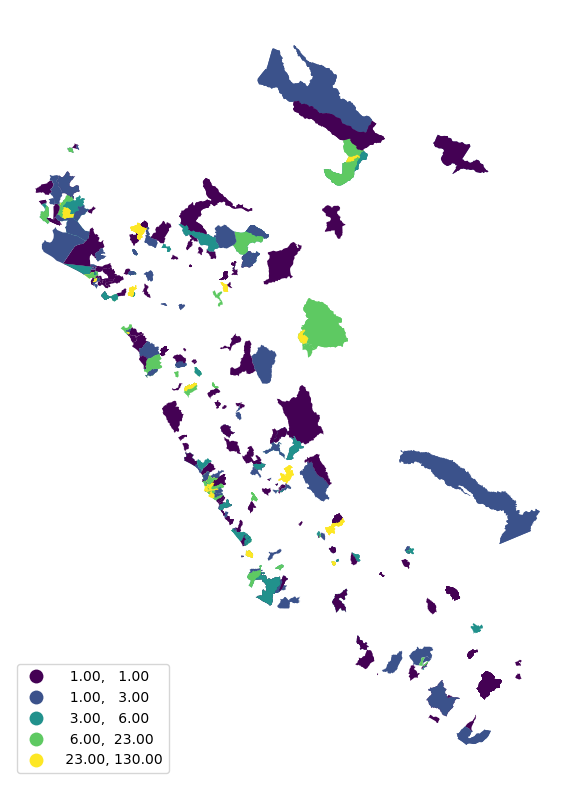

In [72]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = gdf.plot(column='count', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

In [73]:
cond1 = df_cd.test_result_date == pd.Timestamp(2020,8,6)
df_06082020_=df_cd.loc[cond1, ]
gdf = gpd.GeoDataFrame(df_06082020_)

/tmp/ipykernel_480522/3480432365.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  cond1 = df_cd.test_result_date == pd.Timestamp(2020,8,6)


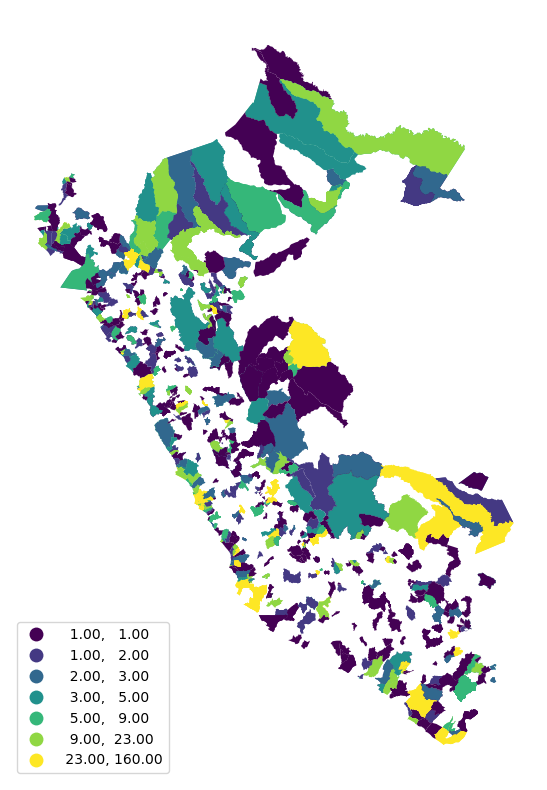

In [74]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = gdf.plot(column='count', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

In [78]:
cond1 = df_cd.test_result_date == pd.Timestamp(2020,9,6)
df_06092020_=df_cd.loc[cond1, ]
gdf = gpd.GeoDataFrame(df_06092020_)

/tmp/ipykernel_480522/3050809216.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  cond1 = df_cd.test_result_date == pd.Timestamp(2020,9,6)


/home/cli/.conda/envs/lich/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/cli/.conda/envs/lich/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


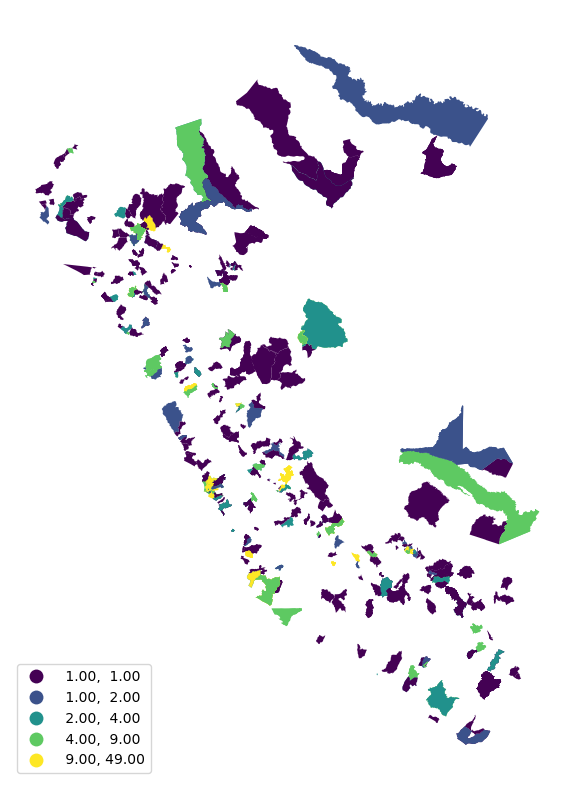

In [79]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = gdf.plot(column='count', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

/tmp/ipykernel_480522/512515292.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  cond1 = df_cd.test_result_date == pd.Timestamp(2020,6,6)


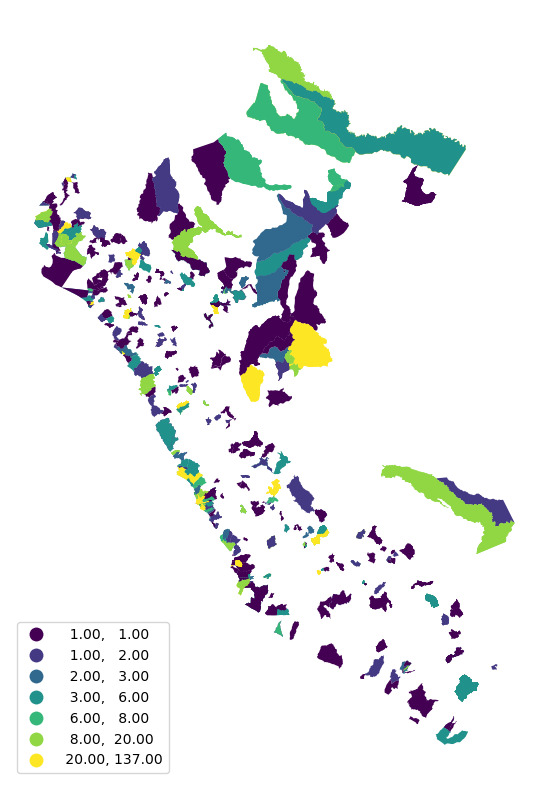

In [80]:
cond1 = df_cd.test_result_date == pd.Timestamp(2020,6,6)
df_06062020_=df_cd.loc[cond1, ]
gdf = gpd.GeoDataFrame(df_06062020_)
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = gdf.plot(column='count', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

In [81]:
df_06062020_

,adm3,test_result_date,gender,count,IDDIST_x,NOMBDIST,OBJECTID,IDDIST_y,IDDPTO,IDPROV,...,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
6845,SAN PABLO,2020-06-06,MASCULINO,1,220205,SAN PABLO,361,080606,08,0806,...,-,EPOCA INDEP.,SAN PABLO,1.765406,0.043902,1.786555,0.043780,52485.78,"POLYGON ((950393.078 8440457.834, 950484.716 8...",48.359210
6846,SAN PABLO,2020-06-06,MASCULINO,1,220205,SAN PABLO,1421,061201,06,0612,...,-,EPOCA INDEP.,SAN PABLO,0.674607,0.016329,0.677922,0.016370,20071.05,"POLYGON ((78790.695 9222448.119, 78931.103 922...",657.798264
6847,SAN PABLO,2020-06-06,MASCULINO,1,220205,SAN PABLO,1478,220205,22,2202,...,10164,05/01/1945,SAN PABLO,0.879671,0.028553,0.889407,0.028465,34794.32,"POLYGON ((333902.020 9252286.319, 334065.585 9...",132.733973
6848,SAN PABLO,2020-06-06,MASCULINO,1,220205,SAN PABLO,1819,160404,16,1604,...,26240,19/10/1993,SAN PABLO DE LORETO,3.744465,0.414244,3.764540,0.413809,509910.57,"POLYGON ((949773.747 9539563.645, 949413.364 9...",1809.839463
6849,SAN PABLO,2020-06-06,MASCULINO,1,160404,SAN PABLO,361,080606,08,0806,...,-,EPOCA INDEP.,SAN PABLO,1.765406,0.043902,1.786555,0.043780,52485.78,"POLYGON ((950393.078 8440457.834, 950484.716 8...",48.359210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842142,SAN JOSE,2020-06-06,MASCULINO,1,210212,SAN JOSE,1387,130705,13,1307,...,S/N,02/01/1857,SAN JOSE,0.695172,0.014603,0.692890,0.014598,17913.85,"POLYGON ((17293.821 9188070.228, 17496.194 918...",110.564418
842143,SAN JOSE,2020-06-06,MASCULINO,1,210212,SAN JOSE,1476,140311,14,1403,...,S/N,17/11/1894,SAN JOSE,0.272022,0.003747,0.271212,0.003695,4547.28,"POLYGON ((-41628.536 9253266.736, -41639.675 9...",1001.575947
847019,SUBTANJALLA,2020-06-06,FEMENINO,4,110112,SUBTANJALLA,381,110112,11,1101,...,13174,10/02/1959,SUBTANJALLA,0.735666,0.015543,0.737883,0.015575,18602.16,"POLYGON ((418462.936 8451165.990, 418600.659 8...",1633.884162
847020,SUBTANJALLA,2020-06-06,MASCULINO,1,110112,SUBTANJALLA,381,110112,11,1101,...,13174,10/02/1959,SUBTANJALLA,0.735666,0.015543,0.737883,0.015575,18602.16,"POLYGON ((418462.936 8451165.990, 418600.659 8...",1633.884162
